## Loading Pertinent Libraries and Data

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
plt.style.use('fivethirtyeight')
import folium
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE

In [2]:
BRFSS = pd.read_csv('BRFSS_FINAL')
Questions = pd.read_csv('Questions')

In [3]:
#Removing District of Columnbia for easier use of Folium
State_num = BRFSS._STATE.unique().tolist()
State_num.remove(11)

In [4]:
STATES = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware", "Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [5]:
State = {}
for state, name in zip(State_num, STATES):
    State[state] = name

In [6]:
BRFSS['d_STATE'] = BRFSS._STATE.map(State)

In [7]:
BRFSS

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PERSDOC2,MEDCOST,CHECKUP1,MARITAL,CHILDREN,...,INTERNET,DECIDE,DIFFALON,MEDICARE,NOCOV121,LSTCOVRG,DRVISITS,CARERCVD,RENTHOM1,d_STATE
0,1.0,3.0,88.0,88.0,99.0,1.0,2.0,1.0,1.0,88.0,...,9.0,9.0,9.0,9.0,9.0,9.0,99.0,9.0,9.0,Alabama
1,1.0,4.0,15.0,88.0,88.0,1.0,2.0,1.0,3.0,88.0,...,9.0,9.0,9.0,9.0,9.0,9.0,99.0,9.0,9.0,Alabama
2,1.0,5.0,7.0,88.0,77.0,1.0,2.0,1.0,1.0,88.0,...,9.0,9.0,9.0,9.0,9.0,9.0,99.0,9.0,9.0,Alabama
3,1.0,5.0,30.0,30.0,30.0,1.0,2.0,1.0,2.0,88.0,...,9.0,9.0,9.0,9.0,9.0,9.0,99.0,9.0,9.0,Alabama
4,1.0,2.0,4.0,15.0,88.0,1.0,2.0,1.0,4.0,88.0,...,9.0,9.0,9.0,9.0,9.0,9.0,99.0,9.0,9.0,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637479,72.0,9.0,88.0,30.0,88.0,1.0,2.0,1.0,1.0,88.0,...,9.0,2.0,2.0,9.0,9.0,9.0,99.0,9.0,1.0,NaN
4637480,72.0,9.0,88.0,88.0,99.0,1.0,2.0,2.0,3.0,88.0,...,9.0,2.0,2.0,9.0,9.0,9.0,99.0,9.0,1.0,NaN
4637481,72.0,9.0,30.0,88.0,30.0,1.0,2.0,2.0,3.0,88.0,...,9.0,2.0,1.0,9.0,9.0,9.0,99.0,9.0,1.0,NaN
4637482,72.0,9.0,88.0,2.0,88.0,1.0,2.0,1.0,6.0,88.0,...,9.0,2.0,2.0,9.0,9.0,9.0,99.0,9.0,1.0,NaN


In [8]:
BRFSS.columns

Index(['_STATE', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PERSDOC2',
       'MEDCOST', 'CHECKUP1', 'MARITAL', 'CHILDREN', 'EDUCA', 'INCOME2', 'SEX',
       'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'MISTMNT', 'HLTHPLN1',
       'ADDEPEV2', 'INTERNET', 'DECIDE', 'DIFFALON', 'MEDICARE', 'NOCOV121',
       'LSTCOVRG', 'DRVISITS', 'CARERCVD', 'RENTHOM1', 'd_STATE'],
      dtype='object')

In [9]:
Questions

,topic,question,variablename,responses,year,type,displayorder
0,Healthy Days — Health Related Quality of Life,"Now thinking about your physical health, which...",PHYSHLTH,1-30=Number of days 88=None 77=Don’t know/Not ...,2018,Core Question,2
1,Healthy Days — Health Related Quality of Life,"Now thinking about your mental health, which i...",MENTHLTH,1-30=Number of days 88=None 77=Don’t know/Not ...,2018,Core Question,3
2,Healthy Days — Health Related Quality of Life,"During the past 30 days, for about how many da...",POORHLTH,1-30=Number of days 88=None 77=Don’t know/Not ...,2018,Core Question,4
3,Health Care Access,"Do you have any kind of health care coverage, ...",HLTHPLN1,1=Yes 2=No 7=Don’t know/Not Sure 9=Refused,2018,Core Question,5
4,Health Care Access,Do you have one person you think of as your pe...,PERSDOC2,"1=Yes, only one 2=More than one 3=No 7=Don’t k...",2018,Core Question,6
...,...,...,...,...,...,...,...
368,Mental Illness and Stigma,"[Prologue] During the past 30 days, about how ...",MISWTLES,1=All 2=Most 3=Some 4=A little 5=None 7=D...,2009,Module Question,237
369,Mental Illness and Stigma,[Prologue: The next question asks if any type ...,MISNOWRK,1-30=Number of days 88=None 77=Don’t know/Not ...,2009,Module Question,238
370,Mental Illness and Stigma,Are you now taking medicine or receiving treat...,MISTMNT,1=Yes 2=No 7=Don’t know/Not sure 9=Refused,2009,Module Question,239
371,Mental Illness and Stigma,[Prologue: The next questions ask about people...,MISTRHLP,Read only if necessary: 1=Agree strongly 2=A...,2009,Module Question,240


## How many participants were there in each state?

In [10]:
population = pd.DataFrame()
population['STATE_Num'] = State
population['STATE'] = population.STATE_Num.map(State)
population.set_index('STATE_Num', inplace=True)
population['Participation'] = BRFSS['_STATE'].value_counts()
population.head()

,STATE,Participation
STATE_Num,,
1.0,Alabama,74668
2.0,Alaska,33782
4.0,Arizona,86631
5.0,Arkansas,49724
6.0,California,133369


In [11]:
pop_participation = population[['STATE', 'Participation']]

pop_participation.columns = ['STATE', 'Participation']

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='Server Participation',
    data=pop_participation,
    columns=['STATE', 'Participation'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'BRFSS Respondants (SUM)').add_to(m)

display(m)

Conclusions: <br>
* Participation spikes in areas that have higher population densities.
* NE has a very high participation rate despite having a less dense population relative to other states
* A look at the county level could help develope a deeper understanding of these trends

## What is the average paricipants perceived health?
#### Due to the wording of this question, a lower average average will be seen as better reported health rating.

In [12]:
print(Questions[Questions.variablename == 'GENHLTH'].question.unique(),'\n', Questions[Questions.variablename == 'GENHLTH'].responses.unique())

['Would you say that in general your health is---'] 
 ['1=Excellent  2=Very good  3=Good  4=Fair  5=Poor  7=DK/NS  9=Refused']


In [13]:
gn_hlth = BRFSS[['d_STATE', 'GENHLTH']]
gn_hlth = gn_hlth[gn_hlth.GENHLTH <= 5]
gn_hlth = gn_hlth.dropna().groupby('d_STATE')['GENHLTH'].mean().to_frame().reset_index()
gn_hlth.columns = ['d_STATE', 'GENHLTH']

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='Self-Reported General Health',
    data=gn_hlth,
    columns=['d_STATE', 'GENHLTH'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'General Health (AVG)').add_to(m)

display(m)

Conclusions: <br>
* Participants in the southeast perceive a lower level of overall health.
* Partipants in the west have higher levels of perceived health.

## How did participants rate their recent physical health?

In [14]:
print('Survey Question: ', Questions[Questions.variablename == 'PHYSHLTH'].question.unique(),'\n', '\n',
      'Response Options: ', Questions[Questions.variablename == 'PHYSHLTH'].responses.unique())

Survey Question:  ['Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?'] 
 
 Response Options:  ['1-30=Number of days 88=None 77=Don’t know/Not sure 99=Refused']


In [15]:
phy_hlth = BRFSS[['d_STATE', 'PHYSHLTH']]
phy_hlth = phy_hlth[phy_hlth.PHYSHLTH <= 5]
phy_hlth = phy_hlth.dropna().groupby('d_STATE')['PHYSHLTH'].mean().to_frame().reset_index()
phy_hlth.columns = ['d_STATE', 'PHYSHLTH']

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='Self-Reported Recent Physical Health',
    data=phy_hlth,
    columns=['d_STATE', 'PHYSHLTH'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'Negative Physical Health (AVG)').add_to(m)

display(m)

Conclustions:
* The southeast has a higher average of negative physical health.
* Despite having higher levels of general health, participants in the southwest deal with physical ailments more frequently.
    * This may be due to higher levels of physical activity and consequently, injury.

## How did participants rate their recent mental health?

In [16]:
print('Survey Question: ', Questions[Questions.variablename == 'MENTHLTH'].question.unique(),'\n', '\n',
      'Response Options: ', Questions[Questions.variablename == 'MENTHLTH'].responses.unique())

Survey Question:  ['Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?'] 
 
 Response Options:  ['1-30=Number of days 88=None 77=Don’t know/Not sure 99=Refused']


In [17]:
mnt = BRFSS[['d_STATE', 'MENTHLTH']]
mnt = mnt[mnt.MENTHLTH <= 5]
mnt = mnt.dropna().groupby('d_STATE')['MENTHLTH'].mean().to_frame().reset_index()
mnt.columns = ['d_STATE', 'MENTHLTH']

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='Self-Reported Recent Mental Health',
    data=mnt,
    columns=['d_STATE', 'MENTHLTH'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'Negative Mental Health (AVG)').add_to(m)

display(m)

Conclustions:
* Participants in the southeast and some portions of the northeast have experienced the highest number of days of negative mental health.

## Did recent poor health, physical and/or mental, affect quality of life?

In [18]:
print('Survey Question: ', Questions[Questions.variablename == 'POORHLTH'].question.unique(),'\n', '\n',
      'Response Options: ', Questions[Questions.variablename == 'POORHLTH'].responses.unique())

Survey Question:  ['During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?'] 
 
 Response Options:  ['1-30=Number of days 88=None 77=Don’t know/Not sure 99=Refused']


In [19]:
mnt = BRFSS[['d_STATE', 'POORHLTH']]
mnt = mnt[mnt.POORHLTH <= 5]
mnt = mnt.dropna().groupby('d_STATE')['POORHLTH'].mean().to_frame().reset_index()
mnt.columns = ['d_STATE', 'POORHLTH']

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='Self-Reported Poor Health and quality of life',
    data=mnt,
    columns=['d_STATE', 'POORHLTH'],
    key_on='feature.properties.name',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= 'Recent Poor Health (AVG)').add_to(m)

display(m)

Conclusions:
* Participants in the southeast have poorer recent health compared to all other regions.

## Are recent displays of psychological pathology correlated with insurance coverage?

In [20]:
print(Questions[Questions.variablename == 'HLTHPLN1'].responses.unique(), '\n', Questions[Questions.variablename == 'HLTHPLN1'].question.unique())
BRFSS['HLTHPLN1'].value_counts()

['1=Yes 2=No 7=Don’t know/Not Sure 9=Refused'] 
 ['Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?']


1.0    3395062
9.0     889807
2.0     344310
7.0       8305
Name: HLTHPLN1, dtype: int64

In [21]:
#isolating yes/no answers for HLTHPLN1
hlth_pln = BRFSS[BRFSS['HLTHPLN1'] <= 2]

#creating a binary response for regression
hlth_pln['HLTHPLN1'].replace({2:0}, inplace=True)
hlth_pln.HLTHPLN1.unique()

array([1., 0.])

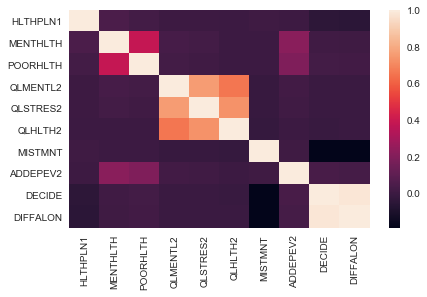

In [22]:
sns.heatmap(hlth_pln[['HLTHPLN1', 'MENTHLTH', 'POORHLTH', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'MISTMNT', 'ADDEPEV2', 'DECIDE', 'DIFFALON']].corr());

In [23]:
print(Questions[Questions.variablename == 'DECIDE'].question.unique())
print(Questions[Questions.variablename == 'DIFFALON'].question.unique())

['Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?']
['Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor´s office or shopping?']


Because DECIDE and DIFFALON are so highly correlated, we will move forward usind DECIDE only.

### Logit Model
#### Highly Correlated Variables Removed

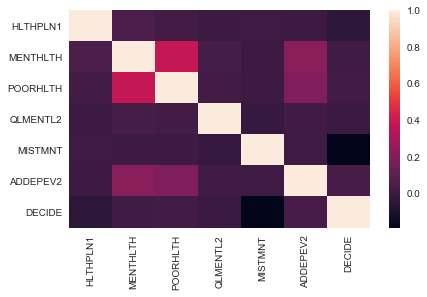

In [24]:
sns.heatmap(hlth_pln[['HLTHPLN1', 'MENTHLTH', 'POORHLTH', 'QLMENTL2', 'MISTMNT', 'ADDEPEV2', 'DECIDE']].corr());

In [25]:
#saving these variables for classification model
clf_HLTHPLN1= BRFSS[['MENTHLTH', 'POORHLTH', 'QLMENTL2', 'MISTMNT', 'ADDEPEV2', 'DECIDE', 'HLTHPLN1']]

X = hlth_pln[['MENTHLTH', 'POORHLTH', 'QLMENTL2', 'MISTMNT', 'ADDEPEV2', 'DECIDE']]
y = hlth_pln['HLTHPLN1']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.305135
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               HLTHPLN1   No. Observations:              3739372
Model:                          Logit   Df Residuals:                  3739365
Method:                           MLE   Df Model:                            6
Date:                Tue, 24 Mar 2020   Pseudo R-squ.:                0.007099
Time:                        21:13:42   Log-Likelihood:            -1.1410e+06
converged:                       True   LL-Null:                   -1.1492e+06
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1055      0.036     58.132      0.000       2.034       2.176
MENTHLTH       0.0041   5.21e-05     78.875      0.000       0.004       0.004
POORHLTH       0.0006   5.46e-05     10.995      0.000       0.000       0.001
QLMENTL2       0.0016      0.000      4.750      0.000       0.001       0.002
MISTMNT       -0.0006      0.001     -0.466      0.641      -0.003       0.002
ADDEPEV2      -0.0367      0.003    -12.005      0.000      -0.043      -0.031
DECIDE        -0.0498      0.001    -92.342      0.000      -0.051      -0.049
==============================================================================
"""

#### Conclusions:
* Recent displays of psycholpathology are correlated with wether one has insurance cooverage or not. The effect is very strong.
* Unsurprisingly, receiving treatment for said issues are not correlated with insurance coverage significantly. 

## Are recent displays of psychopathology correlated with not having insurance coverage the previous year?

In [26]:
print(Questions[Questions.variablename == 'NOCOV121'].responses.unique(), '\n', Questions[Questions.variablename == 'NOCOV121'].question.unique())
BRFSS['NOCOV121'].value_counts()

['1=Yes 2=No 7=Don’t know/Not Sure 9=Refused'] 
 ['In the PAST 12 MONTHS was there any time when you did NOT have ANY health insurance or coverage?']


9.0    3882373
2.0     714144
1.0      39859
7.0       1108
Name: NOCOV121, dtype: int64

In [27]:
#isolating yes/no answers for HLTHPLN1
no_cov = BRFSS[BRFSS['NOCOV121'] <= 2]

#creating a binary response for regression
no_cov['NOCOV121'].replace({2:0}, inplace=True)
no_cov.NOCOV121.unique()

array([0., 1.])

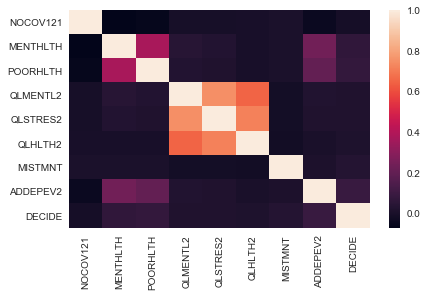

In [28]:
sns.heatmap(no_cov[['NOCOV121', 'MENTHLTH', 'POORHLTH', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'MISTMNT', 'ADDEPEV2', 'DECIDE']].corr());

### Logit Model
#### Highly Correlated Variables Removed

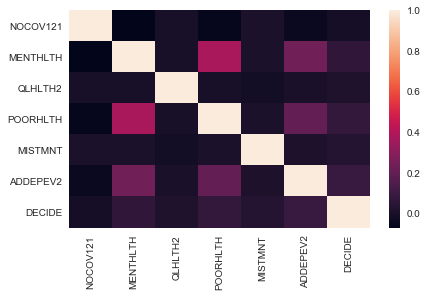

In [29]:
sns.heatmap(no_cov[['NOCOV121', 'MENTHLTH', 'QLHLTH2', 'POORHLTH', 'MISTMNT', 'ADDEPEV2', 'DECIDE']].corr());

In [94]:
for x in clf_HLTHPLN1.columns:
    print(Questions[Questions.variablename == x].variablename.unique(),Questions[Questions.variablename == x].question.unique())

['MENTHLTH'] ['Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?']
['POORHLTH'] ['During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?']
['QLMENTL2'] ['During the past 30 days, for about how may days have you felt sad, blue, or depressed?']
['MISTMNT'] ['Are you now taking medicine or receiving treatment from a doctor or other health professional for any type of mental health condition or emotional problem?']
['ADDEPEV2'] ['(Ever told) you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?']
['DECIDE'] ['Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?']
['HLTHPLN1'] ['Do you have any kind of health care coverage, i

In [101]:
#saving these variables for classification model
clf_NOCOV121 = BRFSS[['MENTHLTH', 'POORHLTH', 'MISTMNT', 'ADDEPEV2', 'DECIDE', 'DIFFALON', 'QLHLTH2', 'NOCOV121']]

X = no_cov[['MENTHLTH', 'POORHLTH', 'MISTMNT', 'ADDEPEV2', 'DECIDE', 'DIFFALON', 'QLHLTH2']]
y = no_cov['NOCOV121']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.203687
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               NOCOV121   No. Observations:               754003
Model:                          Logit   Df Residuals:                   753995
Method:                           MLE   Df Model:                            7
Date:                Thu, 26 Mar 2020   Pseudo R-squ.:                 0.01534
Time:                        00:16:34   Log-Likelihood:            -1.5358e+05
converged:                       True   LL-Null:                   -1.5597e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0779      0.078    -26.800      0.000      -2.230      -1.926
MENTHLTH      -0.0060      0.000    -40.746      0.000      -0.006      -0.006
POORHLTH      -0.0038      0.000    -25.679      0.000      -0.004      -0.004
MISTMNT        0.0229      0.004      5.727      0.000       0.015       0.031
ADDEPEV2      -0.1651      0.011    -15.019      0.000      -0.187      -0.144
DECIDE        -0.0756      0.008     -9.953      0.000      -0.090      -0.061
DIFFALON       0.0773      0.007     10.737      0.000       0.063       0.091
QLHLTH2       -0.0008      0.001     -1.179      0.239      -0.002       0.001
==============================================================================
"""

#### Conclusions:
* Recent displays of psycholpathology are correlated with not having insurance the previous year.
* All variables signficantly contribute to predicting not having insurance during the previous year excluding QLHLTH2

## Predicting Insurance Coverage via Classification Model

In [31]:
clf_list = []
clf_list.append(LogisticRegression(random_state=0))
clf_list.append(XGBClassifier(random_state=0))
clf_list.append(AdaBoostClassifier(random_state=0))
clf_list.append(GradientBoostingClassifier(random_state=0))

def classifier_generator(y, X, clf_list):
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    for clf in clf_list:
        
        clf.fit(X_train, y_train)

        training_preds = clf.predict(X_train)
        test_preds = clf.predict(X_test)
        
        training_accuracy = accuracy_score(y_train, training_preds)
        test_accuracy = accuracy_score(y_test, test_preds)
        print('----------------------------------------------------------------')
        print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
        print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))
        print(classification_report(y_test, test_preds))
        
        cm = ConfusionMatrix(clf, classes=[0,1,7])
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        cm.show();
        print('----------------------------------------------------------------')

In [86]:
Questions[Questions.variablename == 'HLTHPLN1'].question.unique()

array(['Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?'],
      dtype=object)

### Can we predict insured status based on recent psychopathology?

In [32]:
clf_HLTHPLN1 = clf_HLTHPLN1[clf_HLTHPLN1['HLTHPLN1'] < 9]
print(clf_HLTHPLN1.HLTHPLN1.value_counts(), Questions[Questions.variablename == 'HLTHPLN1'].responses.unique())

1.0    3395062
2.0     344310
7.0       8305
Name: HLTHPLN1, dtype: int64 ['1=Yes 2=No 7=Don’t know/Not Sure 9=Refused']


The classes are grossly imbalanced we will need downsample to create classification model with teeth.

In [33]:
yes = clf_HLTHPLN1[clf_HLTHPLN1.HLTHPLN1 == 1].sample(n=8305)
no = clf_HLTHPLN1[clf_HLTHPLN1.HLTHPLN1 == 2].sample(n=8305)
uhhh = clf_HLTHPLN1[clf_HLTHPLN1.HLTHPLN1 == 7]

clf_HLTHPLN1_ds = pd.concat([yes, no, uhhh])

In [34]:
clf_HLTHPLN1_ds.HLTHPLN1.value_counts(normalize=True)

7.0    0.333333
2.0    0.333333
1.0    0.333333
Name: HLTHPLN1, dtype: float64

Base probability of being classified as a member of each class is ~33% after subsampling.

----------------------------------------------------------------
Training Accuracy: 37.51%
Validation Accuracy: 38.69%
              precision    recall  f1-score   support

         1.0       0.41      0.21      0.28      2108
         2.0       0.38      0.47      0.42      2062
         7.0       0.38      0.49      0.43      2059

   micro avg       0.39      0.39      0.39      6229
   macro avg       0.39      0.39      0.38      6229
weighted avg       0.39      0.39      0.37      6229



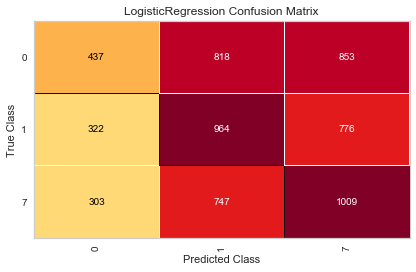

----------------------------------------------------------------
----------------------------------------------------------------
Training Accuracy: 40.98%
Validation Accuracy: 40.22%
              precision    recall  f1-score   support

         1.0       0.39      0.53      0.45      2108
         2.0       0.40      0.40      0.40      2062
         7.0       0.44      0.27      0.34      2059

   micro avg       0.40      0.40      0.40      6229
   macro avg       0.41      0.40      0.40      6229
weighted avg       0.41      0.40      0.40      6229



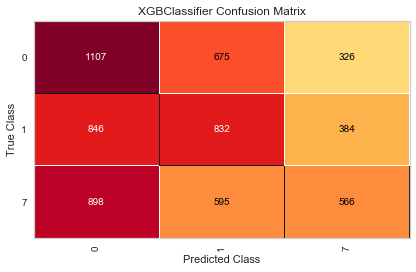

----------------------------------------------------------------
----------------------------------------------------------------
Training Accuracy: 40.31%
Validation Accuracy: 39.83%
              precision    recall  f1-score   support

         1.0       0.39      0.53      0.45      2108
         2.0       0.39      0.40      0.40      2062
         7.0       0.44      0.26      0.33      2059

   micro avg       0.40      0.40      0.40      6229
   macro avg       0.41      0.40      0.39      6229
weighted avg       0.41      0.40      0.39      6229



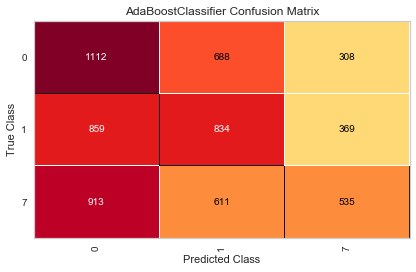

----------------------------------------------------------------
----------------------------------------------------------------
Training Accuracy: 41.23%
Validation Accuracy: 39.97%
              precision    recall  f1-score   support

         1.0       0.39      0.53      0.45      2108
         2.0       0.39      0.40      0.40      2062
         7.0       0.44      0.27      0.33      2059

   micro avg       0.40      0.40      0.40      6229
   macro avg       0.41      0.40      0.39      6229
weighted avg       0.41      0.40      0.39      6229



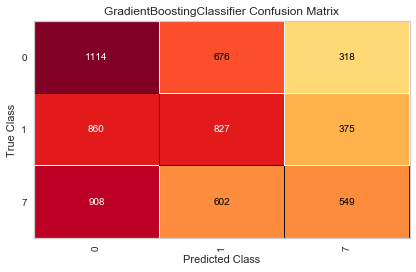

----------------------------------------------------------------


In [40]:
classifier_generator(clf_HLTHPLN1_ds['HLTHPLN1'], clf_HLTHPLN1_ds.drop('HLTHPLN1', axis =1), clf_list)

XGBClassifier has the most promise. Will see if fine tuning helps performance.

--------------------------------Before Hyperparameter Tuniing--------------------------------
Training Accuracy: 40.98%
Validation Accuracy: 40.22%
              precision    recall  f1-score   support

         1.0       0.39      0.53      0.45      2108
         2.0       0.40      0.40      0.40      2062
         7.0       0.44      0.27      0.34      2059

   micro avg       0.40      0.40      0.40      6229
   macro avg       0.41      0.40      0.40      6229
weighted avg       0.41      0.40      0.40      6229



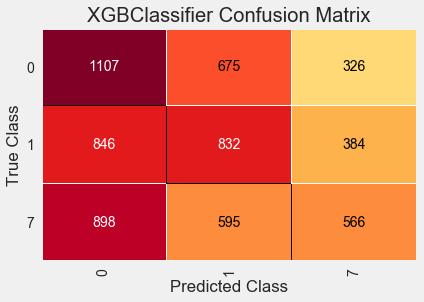

----------------------------------------------------------------
--------------------------------After Hyperparameter Tuniing--------------------------------
Grid Search found the following optimal parameters: 

learning_rate: 0.05
max_depth: 6
min_child_weight: 2
n_estimators: 40
subsample: 0.7
Hyperparameter Tuned Model: 

Training Accuracy: 41.77%
Validation Accuracy: 39.94%
              precision    recall  f1-score   support

         1.0       0.39      0.53      0.45      2108
         2.0       0.39      0.41      0.40      2062
         7.0       0.44      0.26      0.33      2059

   micro avg       0.40      0.40      0.40      6229
   macro avg       0.41      0.40      0.39      6229
weighted avg       0.41      0.40      0.39      6229



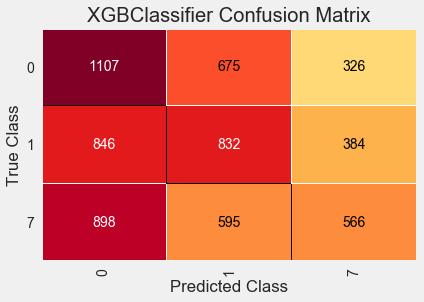

In [74]:
X = clf_HLTHPLN1_ds.drop('HLTHPLN1', axis =1)
y = clf_HLTHPLN1_ds['HLTHPLN1']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = XGBClassifier(random_state=0)
clf.fit(X_train, y_train)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('--------------------------------Before Hyperparameter Tuniing--------------------------------')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))
print(classification_report(y_test, test_preds))

cm = ConfusionMatrix(clf, classes=[0,1,7])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();
print('----------------------------------------------------------------')

print('--------------------------------After Hyperparameter Tuniing--------------------------------')

param_grid = {'learning_rate': [.05, 0.1, .15],
'max_depth': [6],
'min_child_weight': [1, 2],
'subsample': [.6 ,.7],
'n_estimators': [30, 40]}

grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters:', '\n')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Hyperparameter Tuned Model:', '\n')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))
print(classification_report(y_test, test_preds))

cm = ConfusionMatrix(clf, classes=[0,1,7])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

--------------------------------Before Hyperparameter Tuniing--------------------------------
Training Accuracy: 40.98%
Validation Accuracy: 40.22%
              precision    recall  f1-score   support

         1.0       0.39      0.53      0.45      2108
         2.0       0.40      0.40      0.40      2062
         7.0       0.44      0.27      0.34      2059

   micro avg       0.40      0.40      0.40      6229
   macro avg       0.41      0.40      0.40      6229
weighted avg       0.41      0.40      0.40      6229



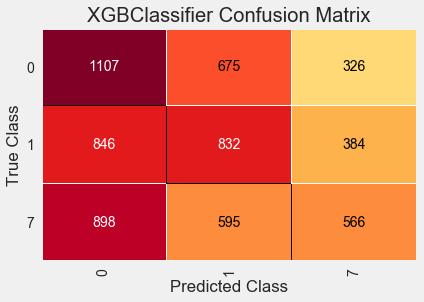

----------------------------------------------------------------
--------------------------------After Hyperparameter Tuniing--------------------------------
Grid Search found the following optimal parameters: 

learning_rate: 0.05
max_depth: 6
min_child_weight: 2
n_estimators: 40
subsample: 0.7
Hyperparameter Tuned Model: 

Training Accuracy: 41.77%
Validation Accuracy: 39.94%
              precision    recall  f1-score   support

         1.0       0.39      0.53      0.45      2108
         2.0       0.39      0.41      0.40      2062
         7.0       0.44      0.26      0.33      2059

   micro avg       0.40      0.40      0.40      6229
   macro avg       0.41      0.40      0.39      6229
weighted avg       0.41      0.40      0.39      6229



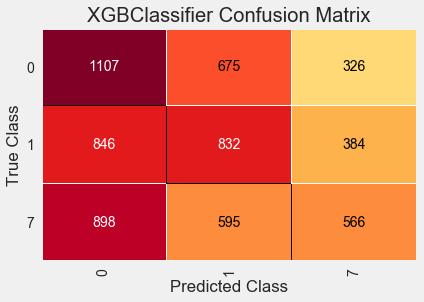

In [68]:
clf_grid_search(clf_HLTHPLN1_ds['HLTHPLN1'], clf_HLTHPLN1_ds.drop('HLTHPLN1', axis =1), XGBClassifier(random_state=0))

* The classification model increased predictive ability by 6.61%
* The model is not ideal for predictions:
    * low f1-score
        * high variance across classes
* Model should not be used to classify insurance status of those with recent psychiatric symptoms

### Can a recent lack of insurance be predicted based on recent psychopathologies?

In [95]:
clf_NOCOV121 = clf_NOCOV121[clf_NOCOV121['NOCOV121'] < 9]
print(clf_NOCOV121.NOCOV121.value_counts(), Questions[Questions.variablename == 'NOCOV121'].responses.unique())

2.0    714144
1.0     39859
7.0      1108
Name: NOCOV121, dtype: int64 ['1=Yes 2=No 7=Don’t know/Not Sure 9=Refused']


The classes are imbalanced yet again. Downsampling will be utiliezed in this instance as well.

In [96]:
yes = clf_NOCOV121[clf_NOCOV121.NOCOV121 == 1].sample(n=1108)
no = clf_NOCOV121[clf_NOCOV121.NOCOV121 == 2].sample(n=1108)
uhhh = clf_NOCOV121[clf_NOCOV121.NOCOV121 == 7]

clf_NOCOV121_ds = pd.concat([yes, no, uhhh])

In [97]:
clf_NOCOV121_ds.NOCOV121.value_counts(normalize=True)

7.0    0.333333
2.0    0.333333
1.0    0.333333
Name: NOCOV121, dtype: float64

In [98]:
clf_NOCOV121_ds

,MENTHLTH,POORHLTH,MISTMNT,ADDEPEV2,DECIDE,DIFFALON,QLHLTH2,NOCOV121
1897737,88.0,99.0,9.0,2.0,9.0,9.0,99.0,1.0
2817352,30.0,3.0,9.0,1.0,2.0,2.0,99.0,1.0
2706700,15.0,30.0,9.0,1.0,1.0,2.0,99.0,1.0
3642053,15.0,88.0,9.0,2.0,1.0,2.0,99.0,1.0
1913794,2.0,88.0,9.0,2.0,2.0,2.0,99.0,1.0
...,...,...,...,...,...,...,...,...
4529282,88.0,99.0,9.0,2.0,1.0,2.0,99.0,7.0
4529323,2.0,88.0,9.0,2.0,1.0,2.0,99.0,7.0
4561638,30.0,77.0,9.0,1.0,1.0,1.0,99.0,7.0
4562593,88.0,99.0,9.0,1.0,9.0,9.0,99.0,7.0


Base probability of being classified as a member of each class is ~33% after subsampling.

----------------------------------------------------------------
Training Accuracy: 39.51%
Validation Accuracy: 41.16%
              precision    recall  f1-score   support

         1.0       0.41      0.46      0.43       285
         2.0       0.40      0.62      0.49       279
         7.0       0.45      0.14      0.22       267

   micro avg       0.41      0.41      0.41       831
   macro avg       0.42      0.41      0.38       831
weighted avg       0.42      0.41      0.38       831



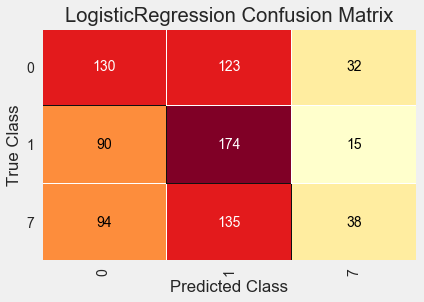

----------------------------------------------------------------
----------------------------------------------------------------
Training Accuracy: 48.54%
Validation Accuracy: 45.25%
              precision    recall  f1-score   support

         1.0       0.46      0.32      0.38       285
         2.0       0.41      0.69      0.51       279
         7.0       0.56      0.35      0.43       267

   micro avg       0.45      0.45      0.45       831
   macro avg       0.48      0.45      0.44       831
weighted avg       0.48      0.45      0.44       831



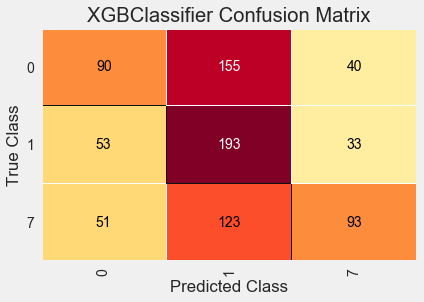

----------------------------------------------------------------
----------------------------------------------------------------
Training Accuracy: 45.33%
Validation Accuracy: 44.4%
              precision    recall  f1-score   support

         1.0       0.44      0.32      0.37       285
         2.0       0.42      0.66      0.51       279
         7.0       0.50      0.35      0.41       267

   micro avg       0.44      0.44      0.44       831
   macro avg       0.46      0.44      0.43       831
weighted avg       0.45      0.44      0.43       831



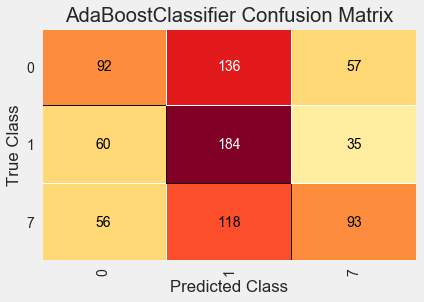

----------------------------------------------------------------
----------------------------------------------------------------
Training Accuracy: 50.38%
Validation Accuracy: 45.97%
              precision    recall  f1-score   support

         1.0       0.47      0.37      0.41       285
         2.0       0.42      0.67      0.52       279
         7.0       0.56      0.33      0.42       267

   micro avg       0.46      0.46      0.46       831
   macro avg       0.48      0.46      0.45       831
weighted avg       0.48      0.46      0.45       831



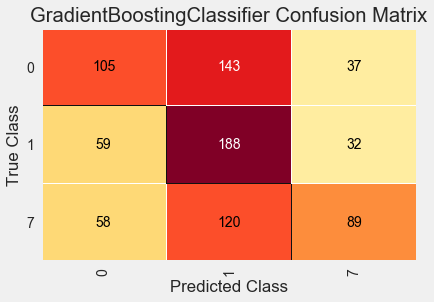

----------------------------------------------------------------


In [99]:
classifier_generator(clf_NOCOV121_ds['NOCOV121'], clf_NOCOV121_ds.drop('NOCOV121', axis =1), clf_list)

GradientBoostingClassifier is the best performing classifier in this scenario.

--------------------------------Before Hyperparameter Tuniing--------------------------------
Training Accuracy: 50.38%
Validation Accuracy: 45.97%
              precision    recall  f1-score   support

         1.0       0.47      0.37      0.41       285
         2.0       0.42      0.67      0.52       279
         7.0       0.56      0.33      0.42       267

   micro avg       0.46      0.46      0.46       831
   macro avg       0.48      0.46      0.45       831
weighted avg       0.48      0.46      0.45       831



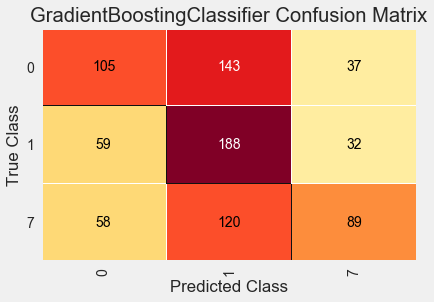

----------------------------------------------------------------
--------------------------------After Hyperparameter Tuniing--------------------------------
Grid Search found the following optimal parameters: 

learning_rate: 0.05
max_depth: 5
min_samples_split: 4
n_estimators: 50
subsample: 0.5
Hyperparameter Tuned Model: 

Training Accuracy: 51.74%
Validation Accuracy: 45.13%
              precision    recall  f1-score   support

         1.0       0.47      0.29      0.36       285
         2.0       0.42      0.70      0.52       279
         7.0       0.51      0.36      0.42       267

   micro avg       0.45      0.45      0.45       831
   macro avg       0.47      0.45      0.44       831
weighted avg       0.47      0.45      0.44       831



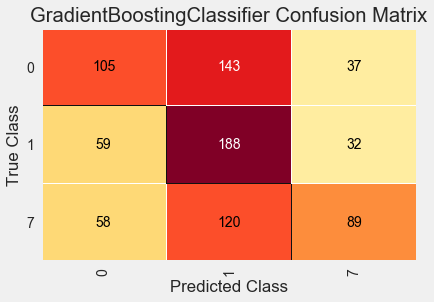

In [100]:
X = clf_NOCOV121_ds.drop('NOCOV121', axis =1)
y = clf_NOCOV121_ds['NOCOV121']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('--------------------------------Before Hyperparameter Tuniing--------------------------------')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))
print(classification_report(y_test, test_preds))

cm = ConfusionMatrix(clf, classes=[0,1,7])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();
print('----------------------------------------------------------------')

print('--------------------------------After Hyperparameter Tuniing--------------------------------')

param_grid = {'learning_rate': [.05, 0.1],
'max_depth': [4,5],
'min_samples_split': [3, 4],
'subsample': [.5, .6],
'n_estimators': [50, 60]}

grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters:', '\n')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Hyperparameter Tuned Model:', '\n')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy * 100))
print(classification_report(y_test, test_preds))

cm = ConfusionMatrix(clf, classes=[0,1,7])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

* The classification model improved identification accuracy 13%
    * far better than the previous model
        * smaller sample pool after downsampling
* Low f1-scores indicate weak predictive ability
* The model cannot be used to predict a recent lack in insurance coverage

# Conclusions
* Higher quality data to facilitate a deeper exploration trends targeted within the present models. 
    * Transining data aquisition to an online format could ellicit more robust responses.
        *Online surveys tend to instill anonymity and by extention, honesty.
* The southeast portions of the U.S. have lower quality of life due to physical and mental health issues.
* Exploration of regions that are generally healthy should be done to examine their contradictory views of thier health.
* Recent mental health issues can act as a predicter or insurance status or an explicit lack of insurance.
* Predicting insured status cannot be done with the low quality data in the present analysis
    * The present analysis should only be used to identify phenomenon that can be explored during subsequent rounds of data collection and analysis.